In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df=pd.read_csv('fashion-mnist_train.csv')
fashion_test_df=pd.read_csv('fashion-mnist_test.csv')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
training=np.array(fashion_train_df,dtype='float32')
testing=np.array(fashion_test_df,dtype='float32')

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

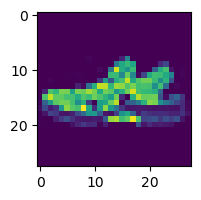

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(training[96,1:].reshape(28,28))

7.0

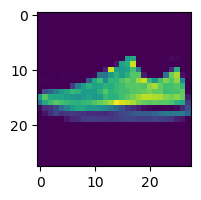

In [21]:
import random 
i =random.randint(1,60000)
plt.figure(figsize=(2,2))
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

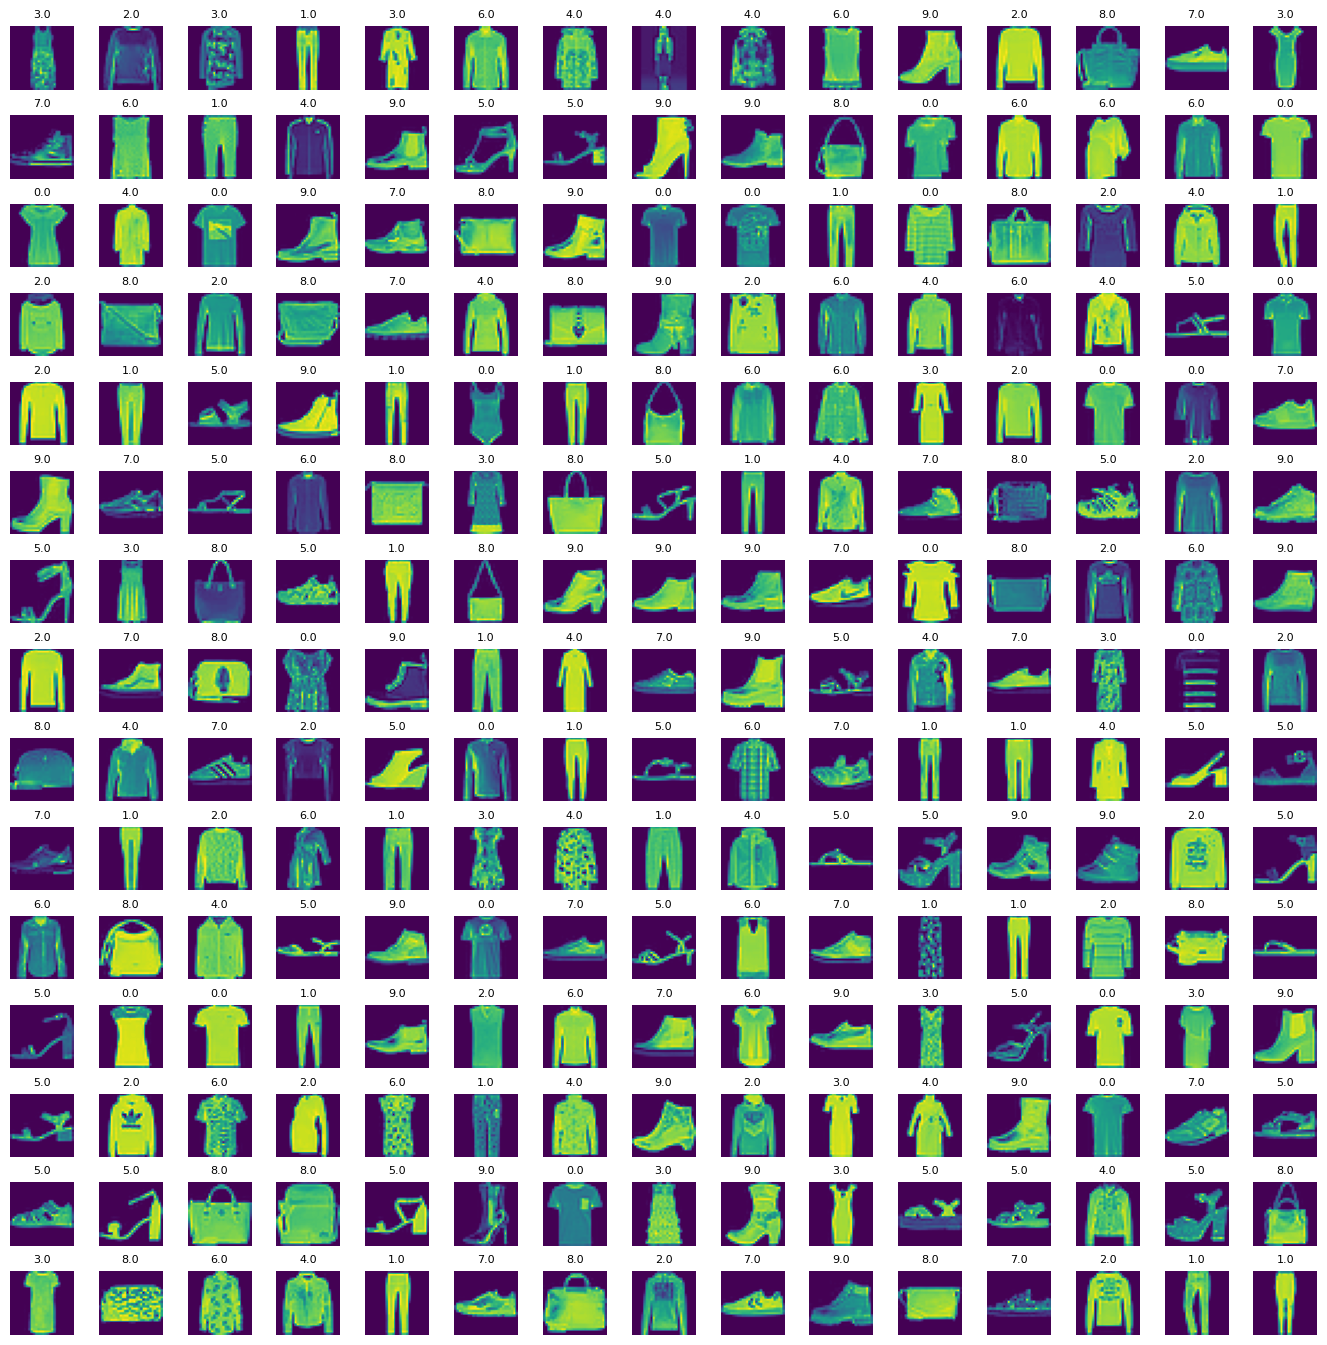

In [22]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() 
n_training = len(training)
for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_training)  
    axes[i].imshow( training[index,1:].reshape(28,28)) 
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [24]:
X_train=training[:,1:]/255
y_train=training[:,0]
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [42]:
X_train.shape 

(48000, 28, 28, 1)

In [41]:
X_validate.shape

(12000, 28, 28, 1)

In [40]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))



In [35]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [43]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32,activation='relu'))
cnn_model.add(Dense(units=10,activation='softmax'))

In [44]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
cnn_model.fit(X_train,
              y_train,
              batch_size=256,
              epochs=50,
              validation_data=(X_validate,y_validate))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4659 - loss: 1.6112 - val_accuracy: 0.7660 - val_loss: 0.6544
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7582 - loss: 0.6649 - val_accuracy: 0.7947 - val_loss: 0.5688
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7897 - loss: 0.5847 - val_accuracy: 0.8122 - val_loss: 0.5213
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7994 - loss: 0.5471 - val_accuracy: 0.8237 - val_loss: 0.4906
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8103 - loss: 0.5247 - val_accuracy: 0.8314 - val_loss: 0.4718
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8171 - loss: 0.5034 - val_accuracy: 0.8352 - val_loss: 0.4604
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8207 - loss: 0.4932 - val_accuracy: 0.8375 - val_loss: 0.4524
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8221 - loss: 0.4775 - val_accuracy: 0.

In [48]:
evaluation=cnn_model.evaluate(X_test,y_test)
print("accuracy=",evaluation[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3474
accuracy= 0.8723999857902527


In [49]:
predictions=cnn_model.predict(X_test)
predicted_classes=np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


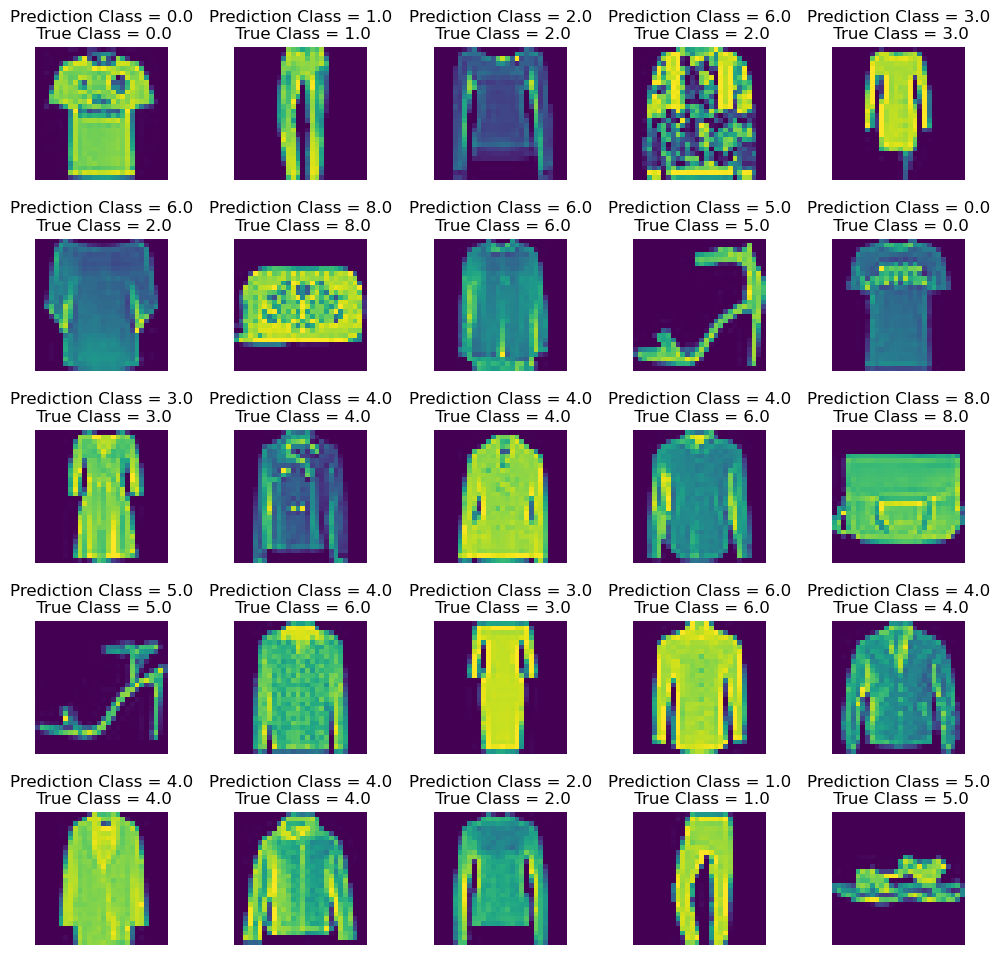

In [50]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)